# Module 6 : Data science (I)

## chapitre 4 & 5 

### 4 Exemple :Iris Dataset. Guide pas à pas sur la façon dont vous pouvez créer vos premiers classificateurs en Python. 

In [2]:
# 4.2 Chargement de l'ensemble de données

from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names
print("Feature names:", feature_names)
print("Target names:", target_names)
print("\nFirst 10 rows of X:\n", X[:10])

Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target names: ['setosa' 'versicolor' 'virginica']

First 10 rows of X:
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]


In [2]:
# Iris data CSV avec Pandas

import pandas as pd
iris_df = pd.read_csv('datasets/iris.csv')
import seaborn as sns
iris_df = sns.load_dataset('iris')
print(type(iris_df),"\n")
print(iris_df.head())

<class 'pandas.core.frame.DataFrame'> 

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


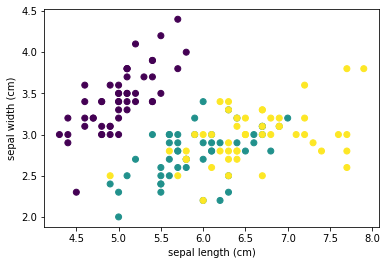

In [14]:
# 4.3 Comprendre les données

# Il est conseillé d'utiliser tous vos moyens pour comprendre les données, typiquement ses distributions.
# La visualisation en est un bon atout

import matplotlib.pyplot as plt
# préparation de données
features = iris.data.T
sepal_length = features[0]
sepal_width = features[1]
petal_length = features[2]
petal_width = features[3]

sepal_length_label = feature_names[0]
sepal_width_label = feature_names[1]
petal_length_label = feature_names[2]
petal_width_label = feature_names[3]

#afficher
plt.scatter(sepal_length, sepal_width, c=iris.target)
plt.xlabel(sepal_length_label)
plt.ylabel(sepal_width_label)
plt.show()
# Nous avons donc tracé la relation de classe avec les deux premiers attributs 'sepal_length' et 'sepal_width'

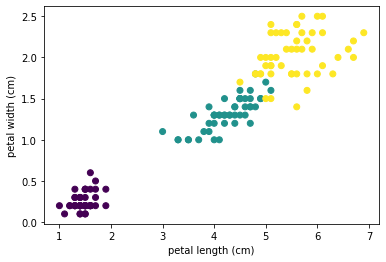

In [15]:
# afficher
plt.scatter(petal_length, petal_width, c=iris.target)
plt.xlabel(petal_length_label)
plt.ylabel(petal_width_label)
plt.show()
# Nous avons donc tracé la relation de classe avec les deux derniers attributs 'petal_length' et 'petal_width'

In [17]:
# Si vous l'avez chargement en tant que DataFrame, nous pouvons utiliser describe pour regarder un
# résumé numérique de chaque attribut
iris_df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [18]:
# Nous pouvons également vérifier la distribution des classes en utilisant groupby et size:
iris_df.groupby('species').size()

species
setosa        50
versicolor    50
virginica     50
dtype: int64

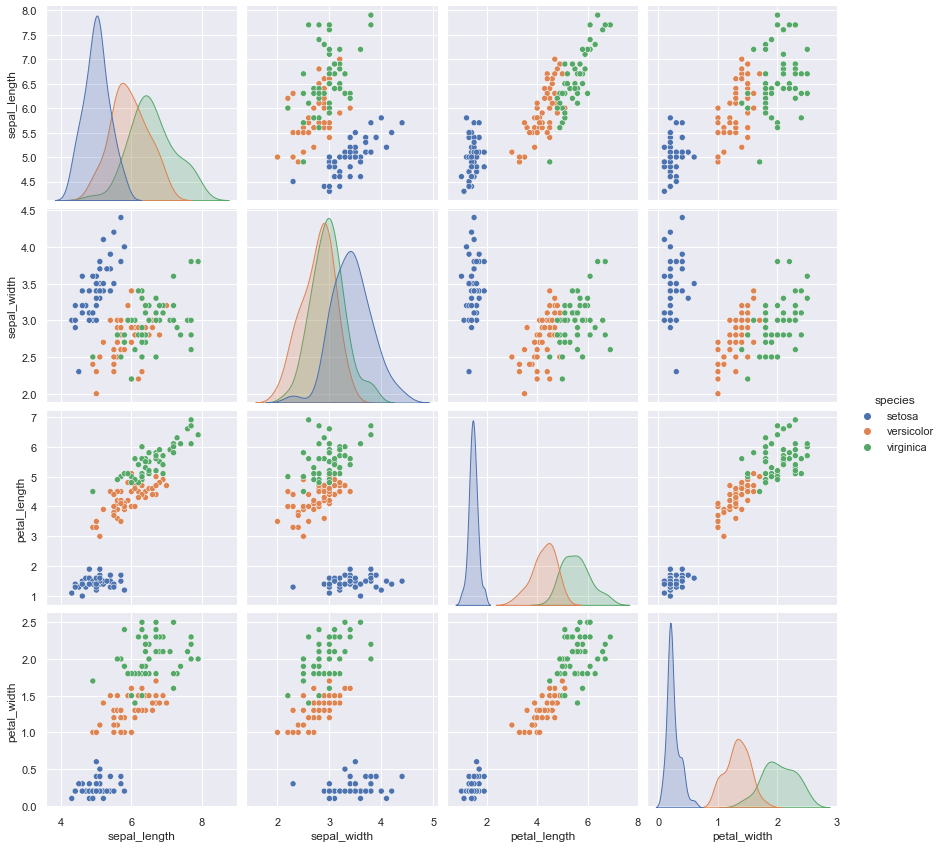

In [19]:
# Grâce à seaborn , nous pouvons tracer rapidement toutes les combinaisons des attributs. ce qui peut
# aussi être fait manuellement avec une boucle et matplotlib

import seaborn as sns; sns.set()
sns.pairplot(iris_df, hue='species', height=3)

In [23]:
# 4.4 Fractionner l'ensemble de données

from sklearn.datasets import load_iris
iris = load_iris()

X = iris.data
y = iris.target

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.3, random_state = 42
)

print(X_train.shape)
print(X_test.shape)

print(y_train.shape)
print(y_test.shape)

(105, 4)
(45, 4)
(105,)
(45,)


In [25]:
# Si on est en version Dataframe, nous pouvons diviser les données par le code suivant:
train_df, test_df = train_test_split(iris_df, test_size = 0.3, stratify = iris_df['species'], random_state = 42)

print(train_df.shape)
print(test_df.shape)

(105, 5)
(45, 5)


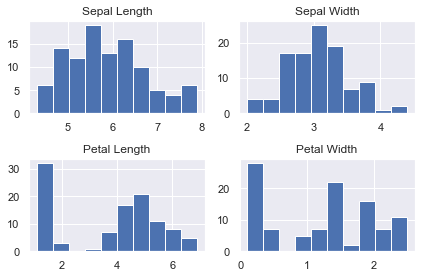

In [26]:
# Après avoir divisé l'ensemble de données, nous pouvons continuer à explorer les données d'entraînement.
# Matplotlib et Seaborn ont tous deux d'excellents outils de traçage que nous pouvons utiliser pour la visualisation.
# Commençons par créer des graphiques univariés. Créez un histogramme pour chaque entité:

n_bins = 10
fig, axs = plt.subplots(2, 2)
axs[0,0].hist(train_df['sepal_length'], bins = n_bins)
axs[0,0].set_title('Sepal Length')
axs[0,1].hist(train_df['sepal_width'], bins = n_bins)
axs[0,1].set_title('Sepal Width')
axs[1,0].hist(train_df['petal_length'], bins = n_bins)
axs[1,0].set_title('Petal Length')
axs[1,1].hist(train_df['petal_width'], bins = n_bins)
axs[1,1].set_title('Petal Width')
# add some spacing between subplots
fig.tight_layout(pad=1.0)

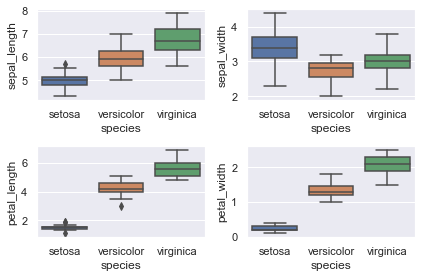

In [28]:
# Ensuite, essayons box plots:

fig, axs = plt.subplots(2, 2)
fn = ["sepal_length", "sepal_width", "petal_length", "petal_width"]
cn = ['setosa', 'versicolor', 'virginica']
sns.boxplot(x = 'species', y = 'sepal_length', data = train_df, order = cn, ax = axs[0,0])
sns.boxplot(x = 'species', y = 'sepal_width', data = train_df, order = cn, ax = axs[0,1])
sns.boxplot(x = 'species', y = 'petal_length', data = train_df, order = cn, ax = axs[1,0])
sns.boxplot(x = 'species', y = 'petal_width', data = train_df, order = cn, ax = axs[1,1])
# add some spacing between subplots
fig.tight_layout(pad=1.0)

In [29]:
# Ensuite, créons une matrice de corrélation pour examiner quantitativement la relation entre les variables:(cf
# Modules Maths et PythonII)

corrmat = train_df.corr()
print(corrmat)

              sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000    -0.097127      0.888678     0.829386
sepal_width      -0.097127     1.000000     -0.379955    -0.327632
petal_length      0.888678    -0.379955      1.000000     0.964521
petal_width       0.829386    -0.327632      0.964521     1.000000


<AxesSubplot:>

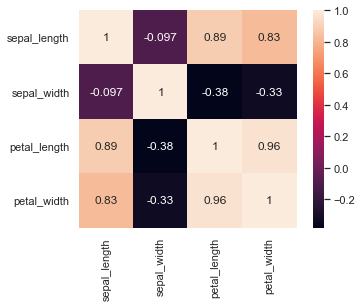

In [30]:
# Nous pouvons le représenter avec un heatmap

sns.heatmap(corrmat, annot = True, square = True)

In [31]:
# 4.5 L'apprentissage du modèle

from sklearn.tree import DecisionTreeClassifier, plot_tree

#Initialiser le modele
mod_dt = DecisionTreeClassifier(max_depth = 3, random_state = 1)
# entrainer le modele
mod_dt.fit(X_train, y_train)
#Utilisé le modèle entrainé avec training set pour prédire test set
prediction = mod_dt.predict(X_test)
print(prediction)

[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0]


In [32]:
# Vous pouvez soit définir votre propre métrique de précision, soit utiliser la métrique classique qui est déjà
# implémenté dans sklearn

from sklearn import metrics
print('The accuracy of the DecisionTree is', "{:.3f}".format(metrics.accuracy_score(prediction,y_test)))

The accuracy of the DecisionTree is 1.000


In [34]:
sample = [[5, 5, 3, 2], [2, 4, 3, 5]]
preds = mod_dt.predict(sample)
pred_species = [iris.target_names[p] for p in preds]
print("Predictions:", pred_species)

Predictions: ['virginica', 'virginica']


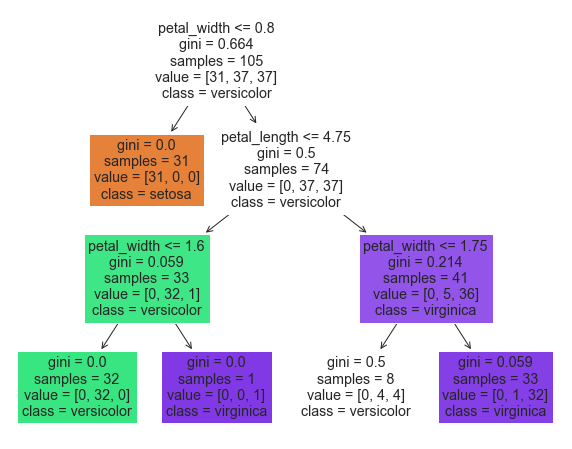

In [35]:
# une bonne chose à propos de l'arbre de décision est que nous pouvons visualiser les règles de
# classification via plot_tree:

plt.figure(figsize = (10,8))
out = plot_tree(mod_dt, feature_names = fn, class_names = cn, filled = True)

### 5 Prétraitement des données

In [37]:
# 5.1 Binarisation
# Cette technique de prétraitement est utilisée lorsque nous devons convertir nos valeurs numériques en valeurs booléennes

import numpy as np
from sklearn import preprocessing
input_data = np.array([
    [2.1, -1.9, 5.5],
    [-1.5, 2.4, 3.5],
    [0.5, -7.9, 5.6],
    [5.9, 2.3, -5.8]
])

data_binarized = preprocessing.Binarizer(threshold=0.5).transform(input_data)
print("\nBinarized data:\n", data_binarized)


Binarized data:
 [[1. 0. 1.]
 [0. 1. 1.]
 [0. 0. 1.]
 [1. 1. 0.]]


In [39]:
# 5.2 Élimination de la moyenne

# Cette technique est utilisée pour éliminer la moyenne du vecteur d'entités de sorte que chaque entité soit
# centrée sur zéro

import numpy as np
from sklearn import preprocessing
input_data = np.array([
    [2.1, -1.9, 5.5],
    [-1.5, 2.4, 3.5],
    [0.5, -7.9, 5.6],
    [5.9, 2.3, -5.8]
])

# displaying the mean and the standard deviation of the input data
print("Mean =", input_data.mean(axis=0))
print("Stddeviation = ", input_data.std(axis=0))
#Removing the mean and the standard deviation of the input data
data_scaled = preprocessing.scale(input_data)
print("Mean_removed =", data_scaled.mean(axis=0))
print("Stddeviation_removed =", data_scaled.std(axis=0))

Mean = [ 1.75  -1.275  2.2  ]
Stddeviation =  [2.71431391 4.20022321 4.69414529]
Mean_removed = [1.11022302e-16 0.00000000e+00 0.00000000e+00]
Stddeviation_removed = [1. 1. 1.]


In [40]:
# 5.3 Mise à l'échelle (Scaling)

# Nous utilisons cette technique de prétraitement pour mettre à l'échelle les vecteurs de caractéristiques. La
# mise à l'échelle des vecteurs de caractéristiques est importante, car les caractéristiques ne doivent pas être
# synthétiquement grandes ou petites.

import numpy as np
from sklearn import preprocessing
input_data = np.array([
    [2.1, -1.9, 5.5],
    [-1.5, 2.4, 3.5],
    [0.5, -7.9, 5.6],
    [5.9, 2.3, -5.8]
])

data_scaler_minmax = preprocessing.MinMaxScaler(feature_range=(0,1))
data_scaled_minmax = data_scaler_minmax.fit_transform(input_data)
print("\nMin max scaled data:\n", data_scaled_minmax)


Min max scaled data:
 [[0.48648649 0.58252427 0.99122807]
 [0.         1.         0.81578947]
 [0.27027027 0.         1.        ]
 [1.         0.99029126 0.        ]]


In [41]:
# 5.4 Normalisation

# Nous utilisons cette technique de prétraitement pour modifier les vecteurs de caractéristiques. La
# normalisation des vecteurs de caractéristiques est nécessaire pour que les vecteurs de caractéristiques
# puissent être mesurés à une échelle commune. Il existe deux types de normalisation:

# 5.4.1 Normalisation L1


import numpy as np
from sklearn import preprocessing
input_data = np.array([
    [2.1, -1.9, 5.5],
    [-1.5, 2.4, 3.5],
    [0.5, -7.9, 5.6],
    [5.9, 2.3, -5.8]
])

data_normalized_l1 = preprocessing.normalize(input_data, norm='l1')
print("\nL1 normalized data:\n", data_normalized_l1)


L1 normalized data:
 [[ 0.22105263 -0.2         0.57894737]
 [-0.2027027   0.32432432  0.47297297]
 [ 0.03571429 -0.56428571  0.4       ]
 [ 0.42142857  0.16428571 -0.41428571]]


In [42]:
# 5.4.2 L2 Normalisation


import numpy as np
from sklearn import preprocessing
input_data = np.array([
    [2.1, -1.9, 5.5],
    [-1.5, 2.4, 3.5],
    [0.5, -7.9, 5.6],
    [5.9, 2.3, -5.8]
])

data_normalized_l2 = preprocessing.normalize(input_data, norm='l2')
print("\nL2 normalized data:\n", data_normalized_l2)


L2 normalized data:
 [[ 0.33946114 -0.30713151  0.88906489]
 [-0.33325106  0.53320169  0.7775858 ]
 [ 0.05156558 -0.81473612  0.57753446]
 [ 0.68706914  0.26784051 -0.6754239 ]]


# TEST

## 1. calculez à l'aide du python, le premier élément du vecteur [5, 4, 8,-1,2,4,6] après normalisation du l2 (4 décimaux) 

In [46]:
import numpy as np
from sklearn import preprocessing
input_data = np.array([
    [5, 4, 8,-1,2,4,6]
])

data_normalized_l2 = preprocessing.normalize(input_data, norm='l2')
print("\nL2 normalized data:\n", data_normalized_l2)


L2 normalized data:
 [[ 0.3928371   0.31426968  0.62853936 -0.07856742  0.15713484  0.31426968
   0.47140452]]


## 2. Suposons que nous avons les points étiquttés suivant: quels sont les classes des trois plus proches points du [3,-1] écrivez sous forme y1,y2,y3 sans espace 

## 5. calculez à l'aide du python, la variance du vecteur [5, 4, 8,-1,2,4,6] (4 décimaux) 

In [3]:
import numpy as np
vecteur = np.array([
    [5, 4, 8,-1,2,4,6]
])

variance = np.var(vecteur)
print("La variance du vecteur est:", variance,"\n")

#v = [5, 4, 8,-1,2,4,6]
#print(np.var(v))

La variance du vecteur est: 7.142857142857143 



## 6. calculez à l'aide du python, le deuxième élément du vecteur [2, 2, 2] après normalisation du L1 (4 décimaux) 

In [55]:
import numpy as np
from sklearn import preprocessing
input_data = np.array([
    [2, 2, 2]
])

data_normalized_l1 = preprocessing.normalize(input_data, norm='l1')
print("\nL1 normalized data:\n", data_normalized_l1)


L1 normalized data:
 [[0.33333333 0.33333333 0.33333333]]


## 7. calculez à l'aide du python, la variance du vecteur [5, 4, 8,-1,2,4,6] après standardization (MinMaxScaler) avec range = (0,2) (4 décimaux) 

In [65]:
import numpy as np
from sklearn import preprocessing
Input_data = np.array([
    [5, 4, 8,-1,2,4,6]
])

Data_scaler_MinMax = preprocessing.MinMaxScaler(feature_range=(0,2))
Data_scaled_MinMax = Data_scaler_MinMax.fit_transform(Input_data)
print("\nData scaled minmax:\n", Data_scaled_MinMax)

#variance
var = np.var(Data_scaled_MinMax)
print("\nLa variance est :", var)


Data scaled minmax:
 [[0. 0. 0. 0. 0. 0. 0.]]

La variance est : 0.0


## 8. en déduire sans python, la variance du vecteur [5, 4, 8,-1,2,4,6] après standardization (MinMaxScaler) avec range = (0,9) (4 décimaux) 

In [66]:
import numpy as np
from sklearn import preprocessing
Input_data = np.array([
    [5, 4, 8,-1,2,4,6]
])

Data_scaler_MinMax = preprocessing.MinMaxScaler(feature_range=(0,9))
Data_scaled_MinMax = Data_scaler_MinMax.fit_transform(Input_data)
print("\nData scaled minmax:\n", Data_scaled_MinMax)

#variance
var = np.var(Data_scaled_MinMax)
print("\nLa variance est :", var)


Data scaled minmax:
 [[0. 0. 0. 0. 0. 0. 0.]]

La variance est : 0.0


## 9. calculez à l'aide du python, la variance du vecteur [5, 4, 8,-1,2,4,6] après standardization (MinMaxScaler) avec range = (0,1) (4 décimaux) 

In [67]:
import numpy as np
from sklearn import preprocessing
Input_data = np.array([
    [5, 4, 8,-1,2,4,6]
])

Data_scaler_MinMax = preprocessing.MinMaxScaler(feature_range=(0,1))
Data_scaled_MinMax = Data_scaler_MinMax.fit_transform(Input_data)
print("\nData scaled minmax:\n", Data_scaled_MinMax)

#variance
var = np.var(Data_scaled_MinMax)
print("\nLa variance est :", var)


Data scaled minmax:
 [[0. 0. 0. 0. 0. 0. 0.]]

La variance est : 0.0


## 10. calculez à l'aide du python, la variance du vecteur [5, 4, 8,-1,2,4,6] après standardization (scale) et 11. calculez à l'aide du python, le sixième élément du vecteur [5, 4, 8,-1,2,4,6] après standardization (scale)

In [73]:
import numpy as np
from sklearn.preprocessing import StandardScaler
Input_data = np.array([
    [5, 4, 8,-1,2,4,6]
])

# the scaler object (model)
Scaler = StandardScaler()
# fit and transform the data
Scaled_data = Scaler.fit_transform(Input_data)
print(Scaled_data,"\n")

# variance
print("Variance :", np.var(Scaled_data))

[[0. 0. 0. 0. 0. 0. 0.]] 

Variance : 0.0


In [2]:
import tensorflow as tf

X_assess = np.random.randn(7, 3)
Y_assess = np.random.randn(3, 3)
#Attention: à savoir que ici, X et Y sont créés juste pour cet exercice
(n_x, n_h, n_y) layer_sizes(X_assess, Y_assess)
print("The size of the input layer is: n_x = + str(n_x))
print("The size of the hidden layer is: n_h=" + str(n_h))
print("The size of the output layer is: n_y= + str(n_y))

SyntaxError: invalid syntax (<ipython-input-2-73e9184e8c40>, line 6)